In [125]:
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [126]:
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.visit(url)
html = browser.html
soup = BeautifulSoup(html, 'html.parser')
data = pd.read_html(url)

In [127]:
# # pulled data to scrape initially, but then opted for pandas method  
# mars_table = soup.find('table').text
# print(mars_table)


In [128]:
table = pd.read_html(url)
table

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [129]:
mars_df = table[0]
mars_df.columns = ['id', 'Terrestrial_Date', 'Sol', 'Ls', 'Month', 'Min_Temp', 'Pressure']
mars_df

,id,Terrestrial_Date,Sol,Ls,Month,Min_Temp,Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [130]:
mars_df.dtypes

id                    int64
Terrestrial_Date     object
Sol                   int64
Ls                    int64
Month                 int64
Min_Temp            float64
Pressure            float64
dtype: object

In [131]:
# converting dates to the correct format
mars_df['Terrestrial_Date'] =  pd.to_datetime(mars_df['Terrestrial_Date'], format="%Y/%m/%d")

In [132]:
mars_df.dtypes

id                           int64
Terrestrial_Date    datetime64[ns]
Sol                          int64
Ls                           int64
Month                        int64
Min_Temp                   float64
Pressure                   float64
dtype: object

In [133]:
mars_df

,id,Terrestrial_Date,Sol,Ls,Month,Min_Temp,Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [134]:
# How many months exist on mars?
# find maximum value of a
# single column 'x'
# max_months = mars_df['Month'].max()
 
# Another method is:
max_months = mars_df.max()['Month']
 
print(f"There are {max_months} months total on Mars")


There are 12 months total on Mars


In [135]:
# How many martian days (sol) worth of data? -> There are 1977 days worth of data

max_sol = mars_df.max()['Sol']
 
print(f"There are {max_sol} total martian days of data collected in this dataset")

There are 1977 total martian days of data collected in this dataset


In [136]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)? 
# Get the answer by averaging the minimum daily temperature of all the months. 
# Plot the results as a bar chart.
# df.groupby(["continent"]).mean()
avgtemp_df = mars_df.groupby(['Month']).mean(['Min_Temp']).reset_index()
avgtemp_df

,Month,id,Sol,Ls,Min_Temp,Pressure
0,1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
1,2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
2,3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
3,4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
4,5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
5,6,735.306122,750.829932,164.897959,-75.299320,745.054422
6,7,714.549296,715.105634,194.894366,-72.281690,795.105634
7,8,718.078014,795.333333,224.347518,-68.382979,873.829787
8,9,785.843284,861.186567,254.052239,-69.171642,913.305970
9,10,955.723214,1034.669643,286.330357,-71.982143,887.312500


In [137]:
warmest_month = avgtemp_df.max()['Min_Temp'].round(2)
coldest_month = avgtemp_df.min()['Min_Temp'].round(2)
print(f'{warmest_month} C is the temperature of month 4, the warmest martian month.')
print(f'The eigth month is coldest with an average temperature of {coldest_month} C.')
print('See the chart further below for visual aid')


-68.38 C is the temperature of month 4, the warmest martian month.
The eigth month is coldest with an average temperature of -83.31 C.
See the chart further below for visual aid


In [138]:
x_axis = avgtemp_df['Month']
y_axis = avgtemp_df['Min_Temp']

In [139]:
%matplotlib inline
plt.style.use('ggplot')

Text(0.5, 1.0, 'Average Degrees Celsius Below Zero by Martian Month')

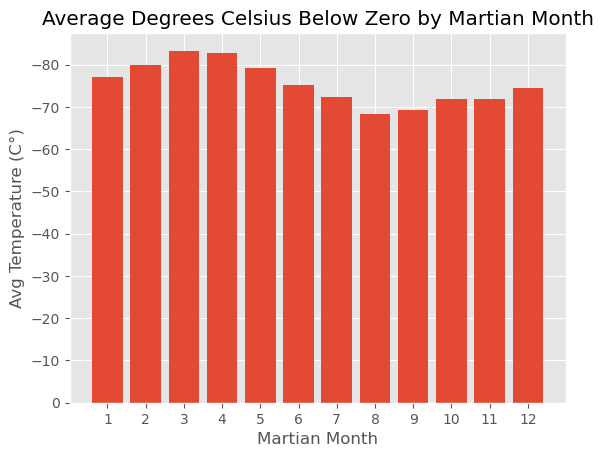

In [140]:
tick_locations = [value for value in x_axis]

plt.bar(x_axis, y_axis)
plt.xticks(tick_locations, x_axis)
plt.gca().invert_yaxis()
plt.ylabel('Avg Temperature (C°)')
plt.xlabel('Martian Month')
plt.title('Average Degrees Celsius Below Zero by Martian Month')




In [141]:
# Answer the following question: Which months have the lowest and 
# the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. 
# Plot the results as a bar chart.
# df.groupby(["continent"]).mean()
avgpress_df = mars_df.groupby(['Month']).mean(['Pressure']).reset_index()
avgpress_df


,Month,id,Sol,Ls,Min_Temp,Pressure
0,1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
1,2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
2,3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
3,4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
4,5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
5,6,735.306122,750.829932,164.897959,-75.299320,745.054422
6,7,714.549296,715.105634,194.894366,-72.281690,795.105634
7,8,718.078014,795.333333,224.347518,-68.382979,873.829787
8,9,785.843284,861.186567,254.052239,-69.171642,913.305970
9,10,955.723214,1034.669643,286.330357,-71.982143,887.312500


In [142]:
x_axis = avgpress_df['Month']
y_axis = avgpress_df['Pressure']

In [143]:
highp_month = avgpress_df.max()['Pressure'].round(2)
lowp_month = avgpress_df.min()['Pressure'].round(2)
print(f'{highp_month} Pa is the temperature of month 9, the warmest martian month.')
print(f'The sixth month is coldest with an average temperature of {lowp_month} Pa.')
print('See the chart further below for visual aid')

913.31 Pa is the temperature of month 9, the warmest martian month.
The sixth month is coldest with an average temperature of 745.05 Pa.
See the chart further below for visual aid


Text(0.5, 1.0, 'Average Atmospheric Pressure by Martian Month')

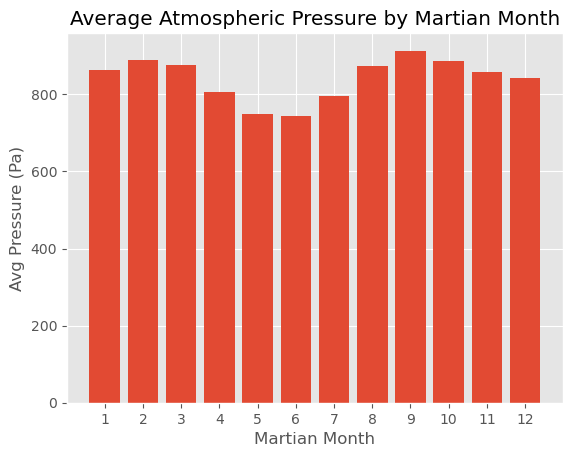

In [144]:
tick_locations = [value for value in x_axis]

plt.bar(x_axis, y_axis)
plt.xticks(tick_locations, x_axis)
# plt.gca().invert_yaxis()
plt.ylabel('Avg Pressure (Pa)')
plt.xlabel('Martian Month')
plt.title('Average Atmospheric Pressure by Martian Month')


In [145]:
# days in a martian year should be equalt to sol@360ls - sol@0ls
# plot daily min_temp to visually estimate result
#assigning x and y axis 
x_axis =  mars_df['Sol']
y_axis = mars_df['Min_Temp']

Text(0.5, 1.0, 'Min Temperaturte (C°) by Sol')

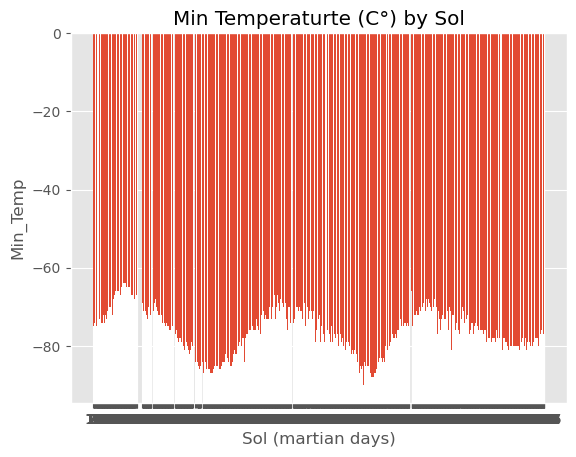

In [146]:
tick_locations = [value for value in x_axis]

plt.bar(x_axis, y_axis)
plt.xticks(tick_locations, x_axis)
# plt.gca().invert_yaxis()
plt.ylabel('Min_Temp')
plt.xlabel('Sol (martian days)')
plt.title('Min Temperaturte (C°) by Sol')
